## Describing Univariate Data with Statistics and Plots

Before building a model or doing any analysis, it's important to understand the data you are working with.  This includes things such as understanding what was measured, how the data was collected, being able to produce useful summaries of the data, and determine if there are any potential problems/mistakes in the data.

Additionally, these things are also useful when you are trying to interpret the results of someone else's analysis.  

You should ALWAYS, ALWAYS look at your data. Don't assume that any method you are trying to use automatically works for the type of data you have.  

In [ ]:
#data source: Times Higher Education/Wall Street Journal via Kaggle: 
#https://www.kaggle.com/datasets/mylesoneill/world-university-rankings
#methodology

In [1]:
import pandas as pd

In [2]:
college = pd.read_csv('../data/timesData.csv')

In [3]:
college.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [5]:
college.set_index('university_name', inplace = True)

In [6]:
college['country'].value_counts()

country
United States of America     659
United Kingdom               300
Germany                      152
Australia                    117
Canada                       108
                            ... 
Unted Kingdom                  1
Cyprus                         1
Unisted States of America      1
Luxembourg                     1
Lithuania                      1
Name: count, Length: 72, dtype: int64

In [7]:
#Find WM
wm = college.index.str.contains('William')
college.loc['William & Mary']

,world_rank,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
university_name,,,,,,,,,,,,,
William & Mary,75,United States of America,53.1,20.9,36.1,95.6,-,60.4,"7,867",11.8,7%,54 : 46,2011
William & Mary,146,United States of America,40.0,19.7,18.9,90.7,27.0,47.0,"7,867",11.8,7%,54 : 46,2012
William & Mary,184,United States of America,41.3,25.8,22.6,87.1,29.9,48.0,"7,867",11.8,7%,54 : 46,2013
William & Mary,201-225,United States of America,37.2,26.0,18.5,73.6,31.9,-,"7,867",11.8,7%,54 : 46,2014
William & Mary,201-225,United States of America,36.8,26.5,19.9,78.7,30.0,-,"7,867",11.8,7%,54 : 46,2015
William & Mary,201-250,United States of America,38.5,26.6,17.5,85.0,29.1,-,"7,867",11.8,7%,54 : 46,2016


## Summary statistics

The most commonly used summary statistics tend to come in two broad categories:

1. Measures of central tendency: what is a "typical" observation? (mean, median, mode)
 
2. Measures of variability: how spread out is the data around the center? (stdev, IQR)


In [8]:
import numpy as np
import matplotlib.pyplot as plt

### Measures of central tendency and histograms

In [9]:
# How many data points do I want?
n = 1000

# Set the random seed to make sure we get the same answers
np.random.seed(146)
x1 = np.random.random(size=n)

In [10]:
#Let's generate more fake data
a = 0.1
b = 0.1
n = 1000
np.random.seed(100)
x2 = np.random.beta(a,b,size=n)

A **histogram** is a good way to explore the distribution of our data. What do we mean by a distribution?

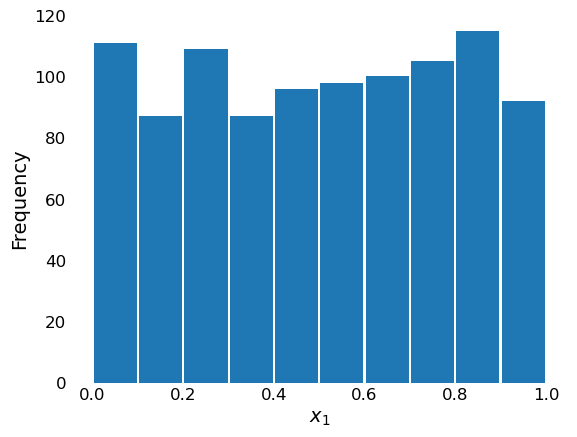

In [11]:
plt.hist(x1, rwidth = 0.95)
ax = plt.gca()
[ax.spines[i].set_visible(False) for i in ax.spines]
plt.tick_params(labelsize = 12, size = 0)
plt.ylabel('Frequency', fontsize = 14)
plt.xlabel('$x_1$', fontsize = 14)
plt.show()

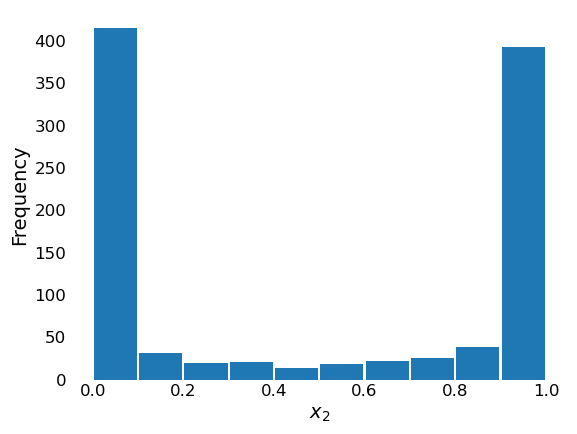

In [12]:
plt.hist(x2, rwidth = 0.95)
ax = plt.gca()
[ax.spines[i].set_visible(False) for i in ax.spines]
plt.tick_params(labelsize = 12, size = 0)
plt.ylabel('Frequency', fontsize = 14)
plt.xlabel('$x_2$', fontsize = 14)
plt.show()

Now let's look at the mean and median for the number of students in the college data for 2016.

In [ ]:
#What is this for?
students = college['num_students'].str.replace(',','').astype('float')

In [ ]:
college['num_students'] = students

In [ ]:
#Subset again

In [3]:
import numpy as np

Based on the values of the mean and the median, do we expect the histogram to be symmetric? Skewed left? Skewed right?

In [5]:
college_2016['num_students'].isnull().sum()

NameError: name 'college_2016' is not defined

In [4]:
#We might want to mod the bin size here
n_bins = 15
min_val = college_2016['num_students'].min()
max_val = college_2016['num_students'].max()
bins = np.linspace(min_val, max_val, n_bins+1)
#notice we are making the plot differently here
#using a Series method
ax = college_2016['num_students'].hist(rwidth = 0.95, bins = bins)
[ax.spines[i].set_visible(False) for i in ax.spines]
plt.ylabel('Frequency', fontsize = 14)
plt.xlabel('Number of Students', fontsize = 14)
plt.grid(None)
plt.show()

NameError: name 'college_2016' is not defined

Whenever you see something like this, where there are a few really large values, and the rest are much smaller, using a **logarithmic** transformation can be useful.  When looking at the log of a number, you are essentially shifting your focus from the actual value of the number to how many digits it has.

For example:
$$ 123,456,789 \approx 1.2 \times 10^8 $$

where we're going to be more focused on the exponent (the 8) rather than the exact value of the number.  Let's make the same plot, but this time using $\log_{10}(\text{num_students})$ rather than the raw number. 

In [ ]:
n_bins = 10
min_val = np.log10(college_2016['num_students']).min()
max_val = np.log10(college_2016['num_students']).max()
bins = np.linspace(1, max_val, n_bins+1)
#notice we are making the plot differently here
#using a Series method
ax = np.log10(college_2016['num_students']).hist(rwidth = 0.95, bins = bins)
[ax.spines[i].set_visible(False) for i in ax.spines]
plt.ylabel('Frequency', fontsize = 14)
plt.xlabel('$log_{10}$'+' Number of Students', fontsize = 14)
plt.grid(None)
plt.show()

### Measures of variation (spread)

Next, we'll look at some **measures of variation**.  While the goal of means and medians is to give a sense of the "middle" of the data, measures of variation tell us how far away from the middle the data tends to be.

The most common measure is the variance, which is the average of the squared differences between each data point and the mean.  Mathematically, if $X=\{x_1,x_2,...,x_N\}$ is a set of $N$ observations, then:

$$Var[X] =  \frac{1}{N}\sum_{i=1}^N (x_i-\mu)^2$$

where $\mu$ is the mean.  You will also often see the symbol $\sigma^2$ used to denote the variance.

In [7]:
np.std(np.linspace(0, 5, 15))

1.5430334996209192

It is common for people to look at the **standard deviation**, which is just the square root of the variance (and is often denoted as $\sigma$).  The benefit of this is that the standard deviation and the mean have the same physical units, so they are more directly comparable. Note that the variance and standard deviation "pair with" the mean - they are the appropriate measures of variation to report when you report the mean.

Taking the ratio of standard deviation / mean is called the **coefficient of variation**.

### Quartiles and Box Plots

Quartiles are computed by sorting the data and splitting it into 4 equally sized groups (hence "quart-", meaning 4).  The numbers reported are the values which split each of these groups (see this [wikipedia page](https://en.wikipedia.org/wiki/Quantile) for some example computations).  In other words, the quartiles of a data set are the 25th, 50th, and 75th percentiles, since those three values divide the data into 4 equally sized groups.

Let's compute the quartiles of the number of students in 2016:

In [ ]:
q = np.quantile(college_2016['num_students'].values, [0.25, 0.5, 0.75])

In [ ]:
print(q)

In [ ]:
#Hmmm, let's try this a different way

In [ ]:
#What is going on????

In [ ]:
students = #fill in

In [ ]:
q = np.quantile(students, [0.25, 0.5, 0.75])

In [ ]:
print(q)

Let's look at the number of citations:

In [ ]:
q = np.quantile(college_2016['citations'].dropna(), [0.25, 0.5, 0.75])

In [ ]:
q

Let's make boxplots of both variables:

What does this box plot tell you about the data?

In [ ]:
plt.figure(figsize=(8,8))
plt.boxplot(college_2016['citations'].dropna())
ax = plt.gca()
[ax.spines[i].set_visible(False) for i in ax.spines]
plt.xticks([])
plt.yticks(fontsize = 14)
plt.grid(linestyle = '--', alpha = 0.5)
plt.title('Citations in 2016', fontsize=14)
plt.show()

How about this one?

In [ ]:
plt.figure(figsize=(8,8))
plt.boxplot(college_2016['num_students'].dropna())
ax = plt.gca()
[ax.spines[i].set_visible(False) for i in ax.spines]
plt.xticks([])
plt.yticks(fontsize = 14)
plt.grid(linestyle = '--', alpha = 0.5)
plt.title('Number of students in 2016', fontsize=14)
plt.show()

## Looking at distributions over the value of another variable

In [ ]:
#Subset data to just Canada

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(x='year', y='num_students', data = college_ca, palette = 'BuPu')
plt.ylabel('Number of students', fontsize=14)
plt.xlabel('')
plt.show()

Here is a stripchart of the same data:

In [ ]:
plt.figure(figsize = [12,6])
ax = plt.gca()
[ax.spines[i].set_visible(False) for i in ax.spines]
sns.stripplot(x = 'year', y = 'num_students', data = college_ca, size = 10, alpha = 0.5,
             jitter = True)
plt.ylabel('Number of Students', labelpad = 20, fontsize = 14)
plt.xlabel('Year', labelpad = 20, fontsize = 14)
plt.tick_params(labelsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)
plt.show()

How does this change the conclusions we might draw from the boxplot?